In [1]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from lista import LISTA, make_loss
from functions import *
from generation import generate, get_lambda_max
from copy import deepcopy

In [2]:
def cov(A_list, B_list=None):
    if B_list is None:
        B_list = [A.T for A in A_list]
    p, q = A_list[0].shape
    _, r = B_list[0].shape
    N = len(A_list)
    M = len(B_list)
    C = np.zeros((N * p, M * r))
    for i, A in enumerate(A_list):
        for j, B in enumerate(B_list):
            C[i * p : (i+1) * p, j * r: (j+1) * r] = A.dot(B)
    return C

In [3]:
n_train = 1000
n_test = 1
k = 2
p = 5
rng = np.random.RandomState(0)
eps = 0.0001
fit_loss = 'l2'
reg = 'l1'

fit_function, der_function = {
                              'l2': (l2_fit, l2_der),
                              'logreg': (logreg_fit, logreg_der)
                              }[fit_loss]
reg_function, prox = {
                      'l2': (l2_pen, l2_prox),
                      'l1': (l1_pen, l1_prox),
                      None: (no_pen, no_prox)
                      }[reg]
loss = make_loss(fit_function, reg_function)

In [4]:
m = max(p, k)
_, D  = np.linalg.eigh(rng.randn(m, m))
D = np.eye(m)
D = D[:k, :p]
diag = np.arange(1, k+1)
D_diag = np.diag(diag).dot(D)
#D = np.random.randn(k, p) * np.arange(1, p + 1)
#U, S, V = np.linalg.svd(D, full_matrices=False)
#S = np.linspace(1, 10, min(p, k)) ** 0.3
#D = np.dot(U * S[:, None], V)
#D /= np.sqrt(np.sum(D ** 2, axis=0))
#D += 0.001 * np.random.randn(k, p)

In [5]:
U, S, V = np.linalg.svd(D, full_matrices=0)
print(U)
print(V)

[[1. 0.]
 [0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [6]:
sigmas = np.linalg.svd(D)[1]

gap = sigmas[0] / sigmas[-1] - 1
print(1 / sigmas)
print(gap)

[1. 1.]
0.0


In [7]:
D, X_train, X_test = generate(p, k, n_test, n_train, D=D, binary= fit_loss == 'logreg', rng=0)
X_train /= get_lambda_max(D, X_train, fit_loss, False)
X_test /= get_lambda_max(D, X_test, fit_loss, False)
lbda_max = get_lambda_max(D, X_train, fit_loss)
print(lbda_max)

1.0


In [8]:
lbda = 0.1
loss_min = LISTA(D_diag, lbda, 1000).compute_loss(X_train)
print(loss_min)

0.10156788269872893


In [9]:
n_layers = 2
lista_unit = LISTA(D, lbda, n_layers, learn_levels=True, variables='W1')
lista = LISTA(D_diag, lbda, n_layers, learn_levels=True, variables='W1')

In [10]:
lista_unit.fit(X_train, backtrack=True, max_iter=2001, verbose=100)
lista.fit(X_train, backtrack=True, max_iter=2001, verbose=100)

it 0, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 1.00e-03
it 100, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 200, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 300, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 400, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 500, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 600, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 700, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 800, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 900, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 1000, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9.77e-07
it 1100, loss = 1.333e-01, grad_W = 2.47e-17, grad_l = 2.67e-18, , l_rate = 9

/home/pierre/work/adopty/adopty/autograd/lista.py:129: UserWarning: loss increasing
  warnings.warn('loss increasing')


it 1000, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07
it 1100, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07
it 1200, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07
it 1300, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07
it 1400, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 1.95e-06
it 1500, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07
it 1600, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 1.95e-06
it 1700, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07
it 1800, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07
it 1900, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07
it 2000, loss = 1.016e-01, grad_W = 1.61e-09, grad_l = 7.42e-11, , l_rate = 9.77e-07


In [11]:
layer = 0
W = lista.weights[2 * layer]
W_unit = lista_unit.weights[2 * layer]

In [12]:
U, S, V = np.linalg.svd(W, full_matrices=False)
u, s, v = np.linalg.svd(W_unit, full_matrices=False)

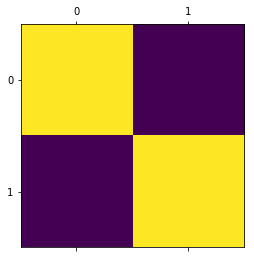

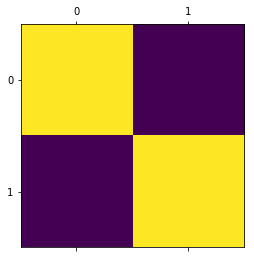

In [13]:
plt.matshow(np.abs(u.T.dot(U)))
plt.matshow(np.abs(v.T.dot(V)))

In [14]:
print(s)
print(lista_unit.levels[0])
print(S/ s)
print(lista.levels[0])

[1. 1.]
[1. 1. 1. 1. 1.]
[1.         0.50003394]
[0.39126595 0.24998242 0.25       0.25       0.25      ]


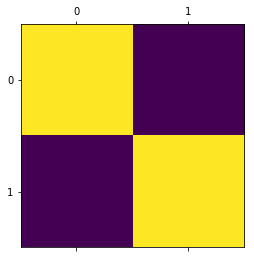

In [15]:
plt.matshow(np.abs(U.T.dot(u)))

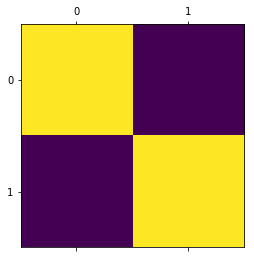

In [16]:
plt.matshow(np.abs(V.dot(V.T)))

In [17]:
lbda_grid = np.linspace(0., 1, 21)
n_layer = 4

In [18]:
weights = []
levels = []
for lbda in lbda_grid:
    print(lbda)
    for n_l in range(1, n_layer + 1):
        print(n_l)
        lista = LISTA(D, lbda, n_l, variables='W1', learn_levels=False)
        if n_l > 1:
            lista.weights[:len(old_weights)] = old_weights
            lista.levels[:len(old_levels)] = old_levels
        lista.fit(X_train, backtrack=True, verbose=100, max_iter=201)
        old_weights = deepcopy(lista.weights)
        old_levels = deepcopy(lista.levels)
    weights.append(old_weights)
    levels.append(old_levels)
L = lista.L

0.0
1
it 0, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 1.00e-03


/home/pierre/work/adopty/adopty/autograd/lista.py:151: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(old_loss - loss_value) / np.abs(loss_value) < thres:


it 100, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 9.77e-07
it 200, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 9.77e-07
2
it 0, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 1.00e-03
it 100, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 9.77e-07
it 200, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 9.77e-07
3
it 0, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 1.00e-03
it 100, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 9.77e-07
it 200, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 9.77e-07
4
it 0, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 1.00e-03
it 100, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 9.77e-07
it 200, loss = 0.000e+00, grad_W = 0.00e+00, grad_l = 0.00e+00, , l_rate = 9.77e-07
0.05
1
it 0, loss = 6.905e-02, grad_W = 3.48e-17, grad_l = 1.75e-18, , l_rat

it 200, loss = 4.262e-01, grad_W = 8.58e-19, grad_l = 1.69e-19, , l_rate = 9.77e-07
2
it 0, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 1.00e-03
it 100, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 9.77e-07
it 200, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 9.77e-07
3
it 0, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 1.00e-03
it 100, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 9.77e-07
it 200, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 9.77e-07
4
it 0, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 1.00e-03
it 100, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 9.77e-07
it 200, loss = 4.262e-01, grad_W = 8.66e-19, grad_l = 1.69e-19, , l_rate = 9.77e-07
0.45
1
it 0, loss = 4.610e-01, grad_W = 1.19e-17, grad_l = 7.64e-18, , l_rate = 1.00e-03
it 100, loss = 4.610e-01, grad_W = 1.19e-17, grad_l = 7.64e-18, , l_rat

it 100, loss = 6.105e-01, grad_W = 7.69e-17, grad_l = 6.15e-17, , l_rate = 9.77e-07
it 200, loss = 6.105e-01, grad_W = 7.69e-17, grad_l = 6.15e-17, , l_rate = 9.77e-07
3
it 0, loss = 6.105e-01, grad_W = 7.69e-17, grad_l = 6.15e-17, , l_rate = 1.00e-03
it 100, loss = 6.105e-01, grad_W = 7.69e-17, grad_l = 6.15e-17, , l_rate = 9.77e-07
it 200, loss = 6.105e-01, grad_W = 7.69e-17, grad_l = 6.15e-17, , l_rate = 9.77e-07
4
it 0, loss = 6.105e-01, grad_W = 7.69e-17, grad_l = 6.15e-17, , l_rate = 1.00e-03
it 100, loss = 6.105e-01, grad_W = 7.69e-17, grad_l = 6.15e-17, , l_rate = 9.77e-07
it 200, loss = 6.105e-01, grad_W = 7.69e-17, grad_l = 6.15e-17, , l_rate = 9.77e-07
0.8500000000000001
1
it 0, loss = 6.197e-01, grad_W = 6.32e-19, grad_l = 3.69e-19, , l_rate = 1.00e-03
it 100, loss = 6.197e-01, grad_W = 6.32e-19, grad_l = 3.69e-19, , l_rate = 9.77e-07
it 200, loss = 6.197e-01, grad_W = 6.32e-19, grad_l = 3.69e-19, , l_rate = 9.77e-07
2
it 0, loss = 6.197e-01, grad_W = 6.35e-19, grad_l = 3.6

In [19]:
eig_dict = {}
tr = lambda a, b, c: (a.T, b, c)
for lbda, W in zip(lbda_grid, weights):
    eig_dict[lbda] = [tr(*np.linalg.svd(w, full_matrices=False)) for w in W[::2]]

In [20]:
eig_H = {}
for lbda, W in zip(lbda_grid, weights):
    eig_H[lbda] = [np.linalg.eig(w @ np.linalg.pinv(D.T)) for w in W[::2]]

In [21]:
def coloring_eig(U, U_target):
    M = np.abs(U.dot(U_target.T))
    M /= np.sqrt(np.sum(M ** 2, axis=1, keepdims=True))
    return M

In [22]:
f, axe = plt.subplots(1, n_layer, sharey=True, figsize=(15, 5))
for layer, ax in enumerate(axe):
    colors = [coloring_eig(eig_dict[lbda][layer][2],
                            eig_dict[lbda_grid[0]][layer][2]) for lbda in lbda_grid]
    eigs = np.array([eig_dict[lbda][layer][1]  for lbda in lbda_grid])
    for i in range(len(eigs) - 1):
        for j in range(k):
            ax.plot(lbda_grid[i:i+2], eigs[i:i+2, j] , color=colors[i][j])
    ax.set_xscale('log')
    ax.set_title('Layer %d' % (layer + 1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f95d300c378> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

<Figure size 1080x360 with 4 Axes>

In [23]:
f, axe = plt.subplots(2, n_layer // 2, figsize=(7, 7), sharey=True)
for layer, ax in enumerate(axe.ravel()):
    colors = [coloring_eig(eig_dict[lbda][layer][2],
                            eig_dict[lbda_grid[0]][layer][2]) for lbda in lbda_grid]
    eigs = np.array([eig_dict[lbda][layer][1]  for lbda in lbda_grid])
    for i in range(len(eigs) - 1):
        for j in range(k):
            ax.plot(lbda_grid[i:i+2], eigs[i:i+2, j] , color=colors[i][j], linewidth=3)
    ax.set_xscale('linear')
    ax.set_title('Layer %d' % (layer + 1))
    ylim = ax.get_ylim()
    #ax = axe[i_layer + 1, j_layer]
    C = cov([eig_dict[lbda][layer][2] for lbda in lbda_grid],
            [np.linalg.pinv(eig_dict[lbda][layer][2]) for lbda in lbda_grid])[:k]
    imlim = -  1 / len(lbda_grid) *  ylim[1]
    ax.imshow(np.abs(C), aspect='auto', extent=[lbda_grid[0], lbda_grid[-1], imlim, 0])
    N_grid = len(lbda_grid)
    ax.vlines(np.linspace(lbda_grid[0], lbda_grid[-1], len(lbda_grid) + 1) , imlim, 0, linewidth=3, color='k')
    ax.set_ylim(imlim, ylim[1])
plt.tight_layout()
#plt.subplots_adjust(wspace=0.1)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f95d300c378> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

<Figure size 504x504 with 4 Axes>

In [24]:
layer = 0
eig_idx = 2
fs = (10, 5)
f, ax = plt.subplots(1, figsize=fs, sharey=True)
colors = [coloring_eig(eig_dict[lbda][layer][eig_idx],
                        eig_dict[lbda_grid[0]][layer][eig_idx]) for lbda in lbda_grid]
eigs = np.array([eig_dict[lbda][layer][1]  for lbda in lbda_grid])
for i in range(len(eigs) - 1):
    for j in range(k):
        ax.plot(lbda_grid[i:i+2], eigs[i:i+2, j] , color=colors[i][j], linewidth=3)
ax.set_xscale('linear')
ax.set_title('Layer %d' % (layer + 1), fontsize=28)
ylim = ax.get_ylim()
#ax = axe[i_layer + 1, j_layer]
lbda_grid_c = lbda_grid[::1]
C = cov([eig_dict[lbda][layer][eig_idx] for lbda in lbda_grid_c])[-k:]
imlim = -  1 / len(lbda_grid_c) *  ylim[1] * fs[0] / fs[1]
ax.imshow(np.abs(C), aspect='auto', extent=[lbda_grid_c[0], lbda_grid_c[-1], imlim, 0])
N_grid = len(lbda_grid_c)
ax.vlines(np.linspace(lbda_grid_c[0], lbda_grid_c[-1], len(lbda_grid_c) + 1) , imlim, 0, linewidth=3, color='k')
ax.set_ylim(imlim, ylim[1])
ax.hlines(0, lbda_grid[0], lbda_grid[-1], linewidth=4, color='indianred')
plt.tight_layout()
ax.set_xlabel(r'$\frac{\lambda}{\lambda_{\max}}$', fontsize=28)
ax.set_ylabel(r'Singular values', fontsize=28)
#plt.subplots_adjust(wspace=0.1)

Text(63.125, 0.5, 'Singular values')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f95d300c378> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

<Figure size 720x360 with 1 Axes>

In [25]:
def plot_cov(C, p, k=None, ax=None):
    if k is None:
        k = p
    u, v = C.shape
    N = u // p
    if ax is None:
        f, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(C ** 2, aspect='equal')
    lwdth = 2
    ax.hlines(np.linspace(0, u, N+1) - 0.5, -0.5, v -0.5, color='k', linewidth=lwdth)
    ax.vlines(np.linspace(0, v, N+1) - 0.5, -0.5, u -0.5, color='k', linewidth=lwdth)

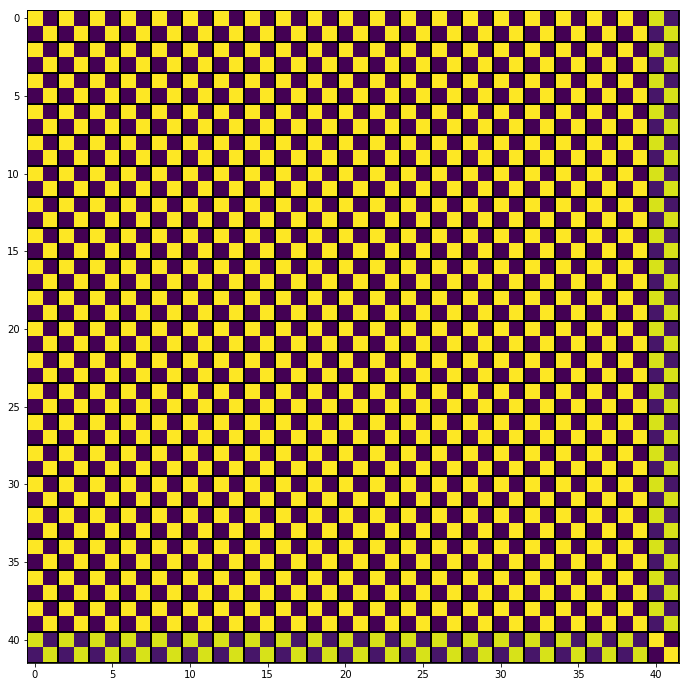

In [26]:
layer = 0
eig_idx = 0
eig_vects = [eig_dict[lbda][layer][eig_idx] for lbda in lbda_grid]
C = cov(eig_vects)


plot_cov(C, eig_vects[0].shape[0])

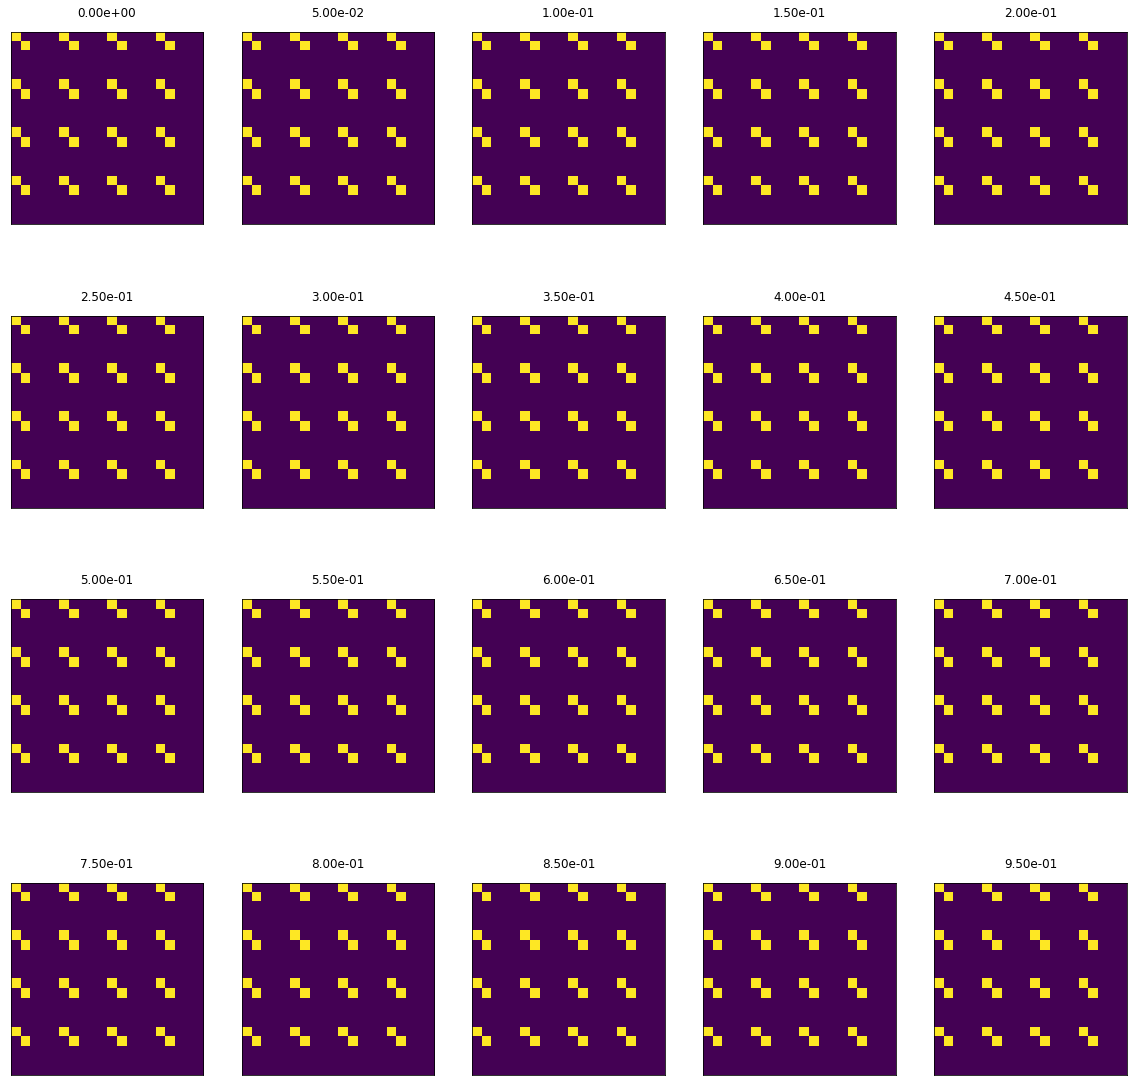

In [27]:
n_rows = 4

f, axe = plt.subplots(n_rows, len(lbda_grid) // n_rows, figsize=(20, 20))
for ax, lbda in zip(axe.ravel(), lbda_grid):
    Cov_mat = cov([eig_dict[lbda][i][0].T for i in range(n_layer)])
    ax.matshow(np.abs(Cov_mat))
    ax.set_title('%.2e' % lbda)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

In [28]:
to_plot = [e[1][-1] for e in eigwd][::-1]
plt.plot(to_plot, np.linspace(0, 1, len(to_plot)))

NameError: name 'eigwd' is not defined

In [ ]:
for i in range(p):
    plt.semilogx(lbda_grid, [e[1][i] for e in eigwd])
plt.title('eigenvalues')

In [ ]:
for i in range(k):
    plt.semilogx(lbda_grid, [e[1][i] for e in eigdw])
plt.title('eigenvalues')

In [ ]:
k = 2
p = 2
D = np.eye(p)
x = np.random.randn(k, 1000)
lbda = 0.5
ista = LISTA(D, lbda, 1000)
z = ista.transform(x)

In [ ]:
plt.scatter(z[0], z[1])

In [ ]:
eps = 1e-7
E = eps * np.random.randn(k, p)
E += E.T
print(np.linalg.eigvals(E))

u, v = np.linalg.eigh(E)
sq = v.dot(np.sqrt(u)[:, None] * v.T)

In [ ]:
noise = E.T.dot(E).dot(np.random.randn(p, 100)) / eps

In [ ]:
z_t = LISTA(D + E, lbda, 1000).transform(x)

In [ ]:
d = (z_t - z)
plt.scatter(d[0], d[1])
#plt.scatter(noise[0], noise[1])
plt.xlim([-3 * eps, 3 * eps])
plt.ylim([-3 * eps, 3 * eps])

In [ ]:
nz = np.sum(d == 0, axis=0)
plt.hist(nz)